<a href="https://colab.research.google.com/github/AnaCristina1972/projett/blob/master/Aula2_RedesNeurais_keras_aula_Regressa%CC%83o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Neste notebook nós trabalharemos com Redes Neurais para resolver problema de Regressão**

## Construindo uma MLP para Regressão Usando a API Sequencial

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import sklearn

In [27]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Vamos carregar entender a base de dados California housing.

In [28]:
from pathlib import Path
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

In [29]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [30]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [31]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Para facilitar o uso da base de dados California housing, nós usaremos a função `fetch_california_housing()` do Scikit-Learn para carregar os dados: essa versão  é mais simples, pois contém apenas atributos numéricos (não há o atributo ocean_proximity) e não há nenhum atributo com valor ausente.

In [32]:
housing = fetch_california_housing()

Depois de carregar os dados, nós os dividimos em um conjunto de treinamento, um conjunto de validação e um conjunto de teste, e normalizamos todos os atributos:

In [33]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [35]:
X_train_scaled[0]

array([-0.19397883, -1.07781319, -0.94338545,  0.01485314,  0.02073335,
       -0.57291624,  0.92926047, -1.42215523])

In [36]:
X_train_scaled.shape

(11610, 8)

In [37]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=X_train.shape[1:]))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(1))

In [38]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                450       
                                                                 
 dense_9 (Dense)             (None, 50)                2550      
                                                                 
 dense_10 (Dense)            (None, 50)                2550      
                                                                 
 dense_11 (Dense)            (None, 1)                 51        
                                                                 
Total params: 5601 (21.88 KB)
Trainable params: 5601 (21.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


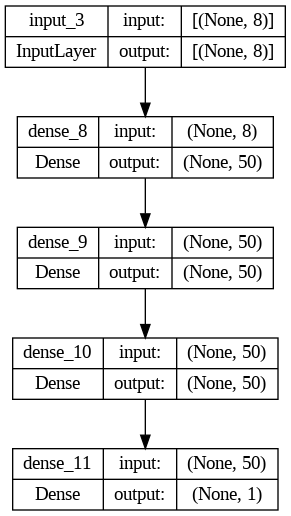

In [39]:
tf.keras.utils.plot_model(model, "meu_modelo.png", show_shapes=True)

In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

In [41]:
history = model.fit(X_train_scaled, y_train, epochs=20,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7930 - root_mean_squared_error: 0.8905 - val_loss: 0.7606 - val_root_mean_squared_error: 0.8721
Epoch 2/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3944 - root_mean_squared_error: 0.6280 - val_loss: 1.0852 - val_root_mean_squared_error: 1.0417
Epoch 3/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3559 - root_mean_squared_error: 0.5965 - val_loss: 2.5286 - val_root_mean_squared_error: 1.5902
Epoch 4/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3580 - root_mean_squared_error: 0.5984 - val_loss: 0.3195 - val_root_mean_squared_error: 0.5652
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3289 - root_mean_squared_error: 0.5735 - val_loss: 0.6879 - val_root_mean_squared_error: 0.8294
Epoch 6/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3193 - root_mean_squared_error: 0.5651 - val_loss: 0.8757 - val_

In [42]:
history.history

{'loss': [0.7930372357368469,
  0.39440077543258667,
  0.3558626174926758,
  0.3580438494682312,
  0.32888373732566833,
  0.31929925084114075,
  0.3091556429862976,
  0.30412372946739197,
  0.29768839478492737,
  0.29337161779403687,
  0.2913956940174103,
  0.28671538829803467,
  0.2823657989501953,
  0.29157930612564087,
  0.27836957573890686,
  0.2819870710372925,
  0.27482181787490845,
  0.2667992413043976,
  0.26923778653144836,
  0.26515141129493713],
 'root_mean_squared_error': [0.8905263543128967,
  0.6280133724212646,
  0.596542239189148,
  0.5983676314353943,
  0.5734838843345642,
  0.5650656819343567,
  0.5560176372528076,
  0.5514741539955139,
  0.5456082820892334,
  0.5416378974914551,
  0.5398107767105103,
  0.5354580879211426,
  0.5313810110092163,
  0.5399808287620544,
  0.5276073813438416,
  0.5310245752334595,
  0.5242345333099365,
  0.5165261030197144,
  0.5188812613487244,
  0.5149285793304443],
 'val_loss': [0.7606405019760132,
  1.0851680040359497,
  2.528585195541

Vamos visualizar o comportamento do modelo.

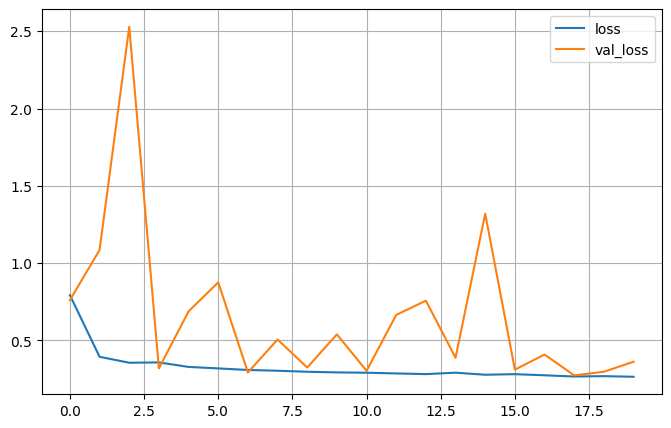

In [43]:
pd.DataFrame(history.history)[['loss', 'val_loss']].plot(figsize=(8, 5))
plt.grid(True)
plt.show()

In [44]:
mse_test, rmse_test = model.evaluate(X_test_scaled, y_test)

162/162 [==============================] - 0s 888us/step - loss: 0.2764 - root_mean_squared_error: 0.5257
